In [24]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-04-21 10:26:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   165MB/s    in 1.2s    

2022-04-21 10:26:59 (165 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-04-21 10:26:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [25]:
import os 
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [26]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('Total rock images for training: ', len(os.listdir(rock_dir)))
print('Total paper images for training: ', len(os.listdir(paper_dir)))
print('Total scissors images for training: ', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

Total rock images for training:  840
Total paper images for training:  840
Total scissors images for training:  840
['rock03-093.png', 'rock01-095.png', 'rock02-027.png', 'rock03-079.png', 'rock02-012.png', 'rock07-k03-053.png', 'rock06ck02-092.png', 'rock03-032.png', 'rock06ck02-051.png', 'rock02-000.png']
['paper05-029.png', 'paper05-080.png', 'paper01-076.png', 'paper06-036.png', 'paper01-107.png', 'paper05-017.png', 'paper02-076.png', 'paper06-008.png', 'paper01-034.png', 'paper06-011.png']
['scissors04-098.png', 'testscissors02-061.png', 'testscissors01-095.png', 'testscissors01-102.png', 'testscissors02-075.png', 'scissors03-067.png', 'scissors01-097.png', 'scissors02-044.png', 'testscissors02-009.png', 'scissors01-083.png']


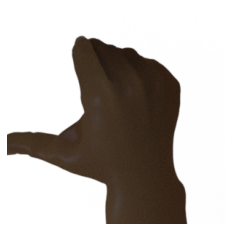

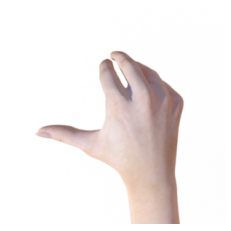

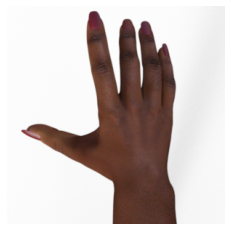

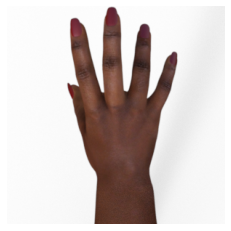

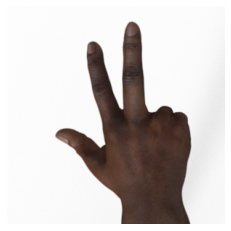

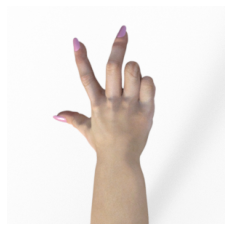

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [28]:
import tensorflow as tf
import keras.preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [29]:
TRAINING_DIR = '/tmp/rps/'
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
VALIDATION_DIR = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [32]:
model = tf.keras.models.Sequential([
                                    # Convulation layers
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    # 512 neurons
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, steps_per_epoch=20, validation_data=validation_generator, verbose=1, validation_steps=3)

model.save('rps.h5')

Epoch 1/50
20/20 [==============================] - 200s 10s/step - loss: 1.4511 - accuracy: 0.3560 - val_loss: 1.0934 - val_accuracy: 0.3333
Epoch 2/50
20/20 [==============================] - 194s 10s/step - loss: 1.1007 - accuracy: 0.4218 - val_loss: 1.3615 - val_accuracy: 0.3333
Epoch 3/50
20/20 [==============================] - 188s 9s/step - loss: 1.0330 - accuracy: 0.4722 - val_loss: 0.7218 - val_accuracy: 0.7097
Epoch 4/50
20/20 [==============================] - 190s 10s/step - loss: 0.8479 - accuracy: 0.5988 - val_loss: 0.6612 - val_accuracy: 0.7204
Epoch 5/50
20/20 [==============================] - 187s 9s/step - loss: 0.7463 - accuracy: 0.6448 - val_loss: 0.7066 - val_accuracy: 0.5376
Epoch 6/50
20/20 [==============================] - 189s 9s/step - loss: 0.6388 - accuracy: 0.7087 - val_loss: 0.3264 - val_accuracy: 0.7957
Epoch 7/50
20/20 [==============================] - 188s 9s/step - loss: 0.4893 - accuracy: 0.7881 - val_loss: 0.1543 - val_accuracy: 0.9516
Epoch 8/50

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)